# Week 40 - Assignment 1
- Generate (at least) 3 different probability distributions ["attributes"]
- Make a meaningful label, and then make a decision tree from the data generated

(Use the given template to sort out Python programming part if you need) 

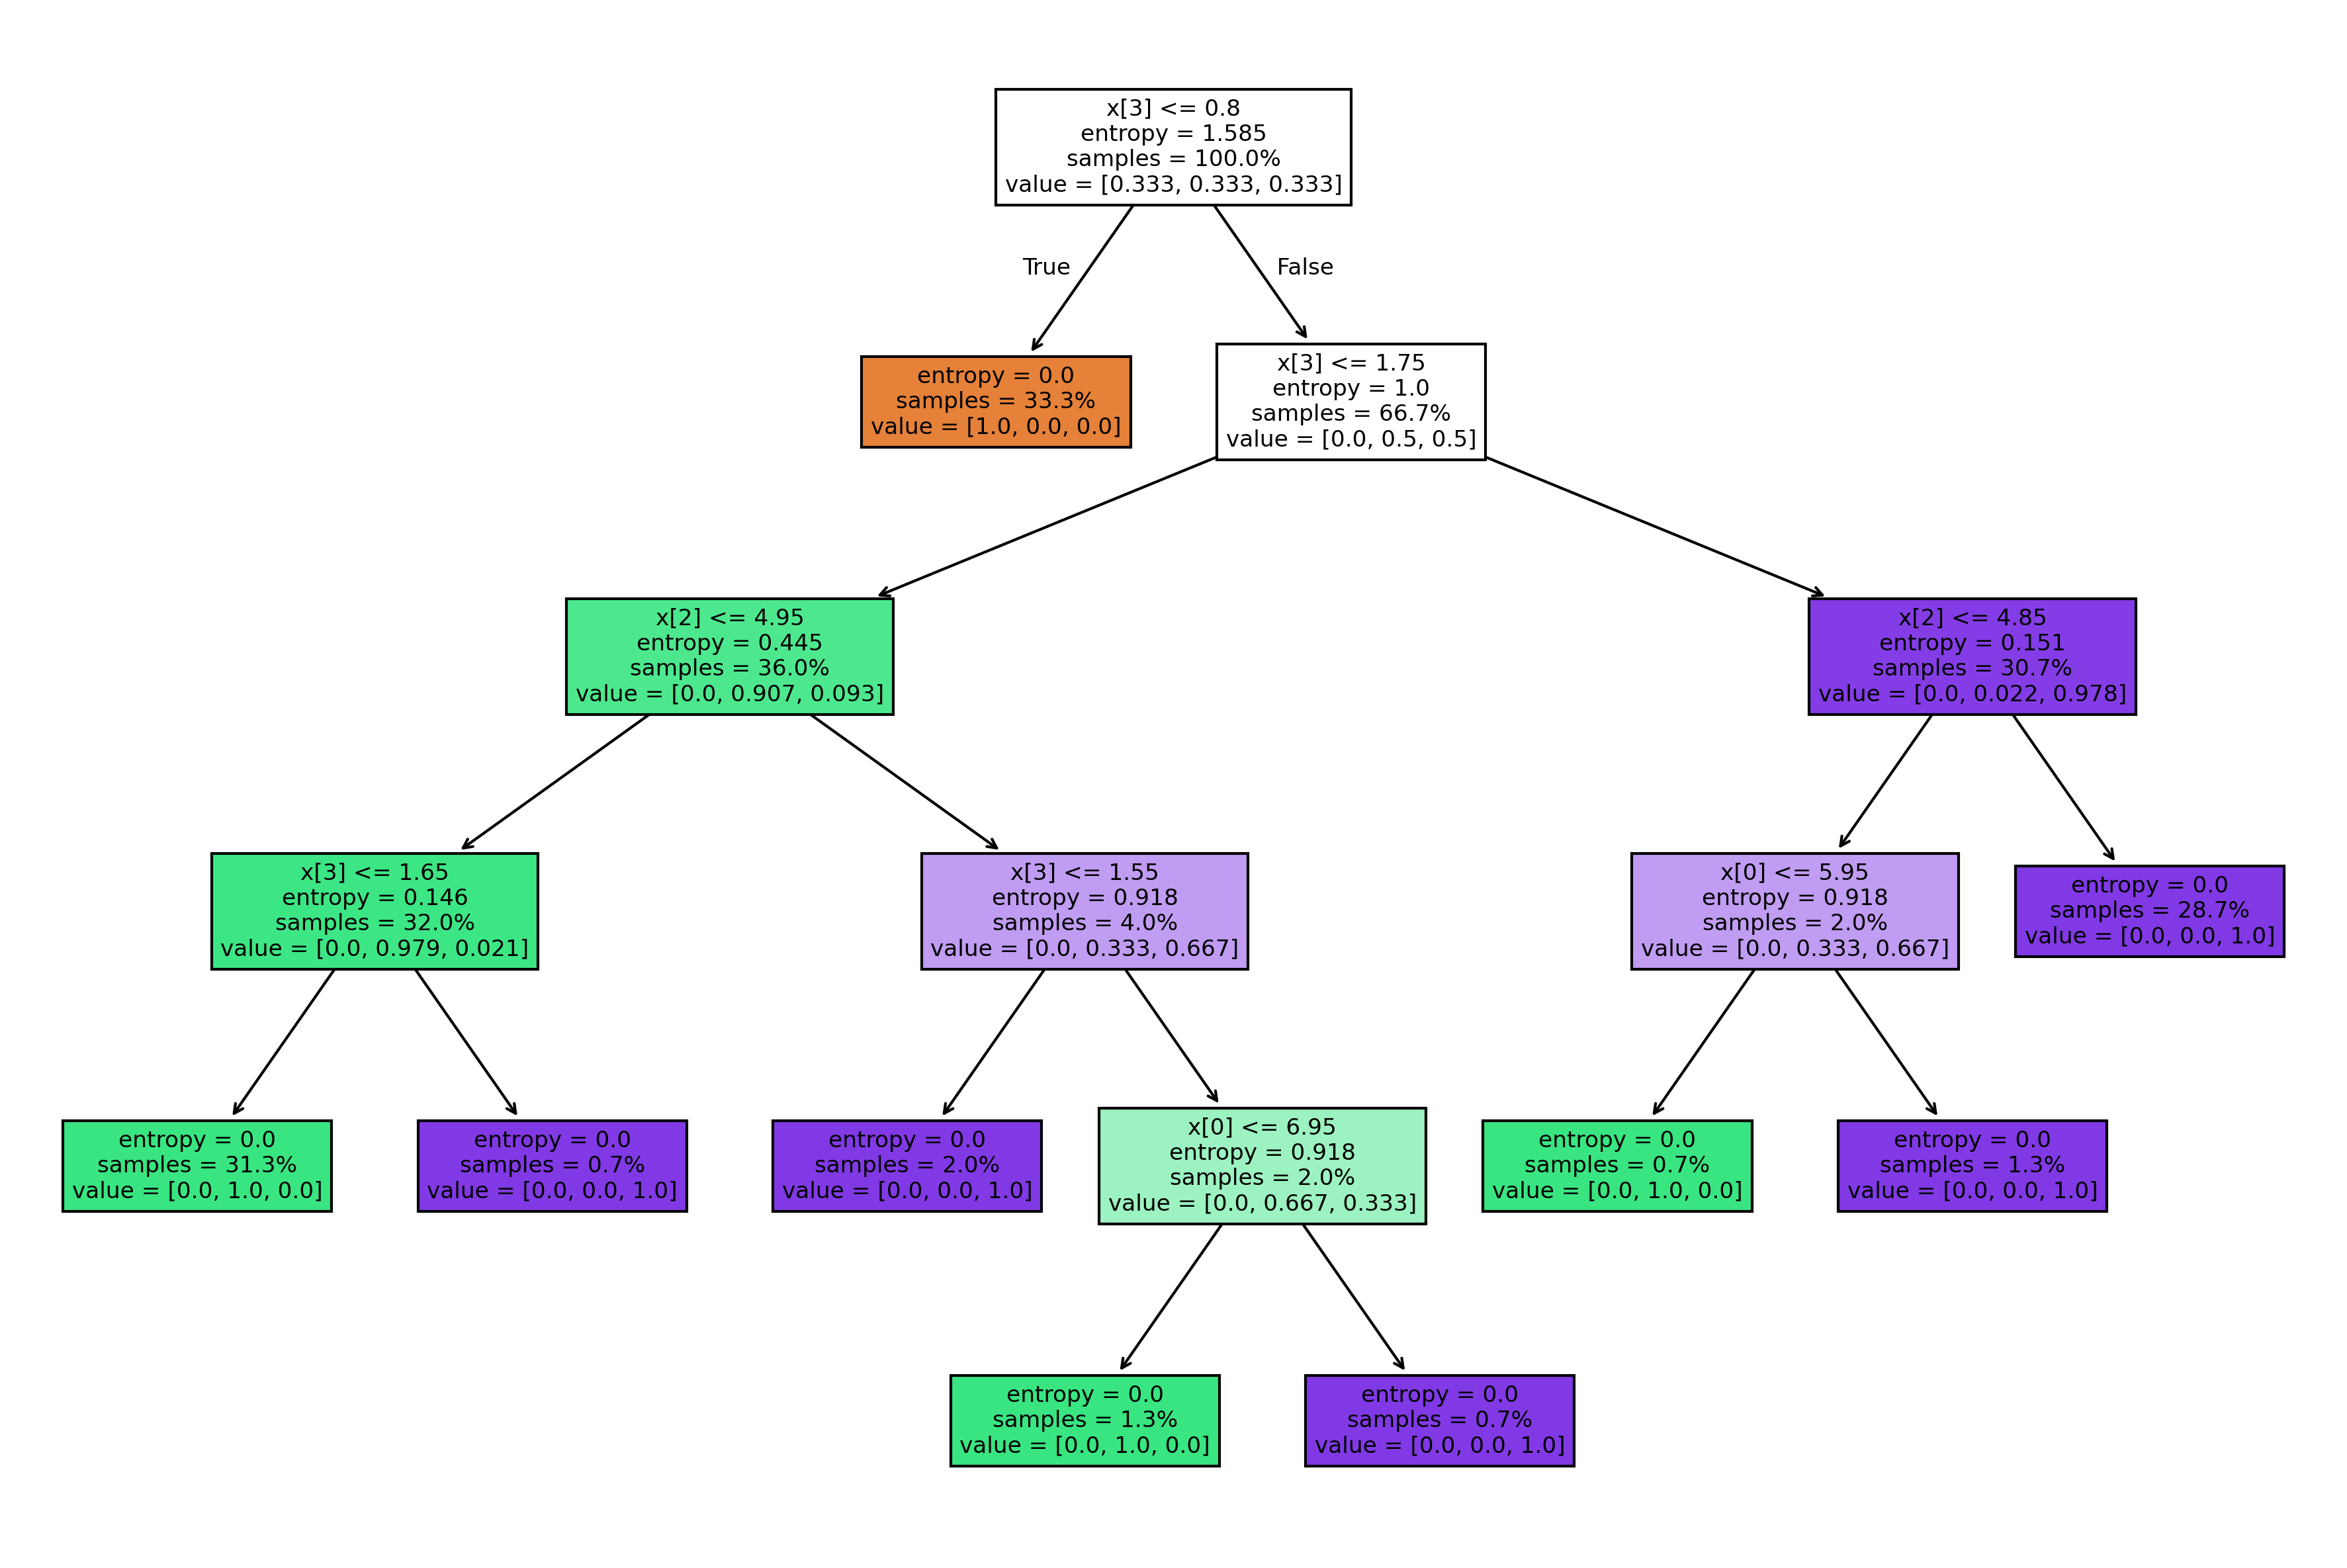

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_leaf_nodes=10,criterion="entropy")

clf.fit(X, y)

plt.figure(figsize=(15, 10), dpi=300)
plot_tree(clf, proportion=True, filled=True)

plt.show()


   Gender  Hours / Week Most Played Genre Platform
0    Male             5               RPG       PC
1    Male            20           Shooter       PC
2  Female            35           Shooter  Console
3    Male            10            Sports  Console
4  Female            50               RPG       PC
5  Female            15            Sports   Mobile
6    Male            40          Strategy       PC
7  Female            25           Shooter  Console
8    Male            30               RPG   Mobile
9  Female            12          Strategy       PC


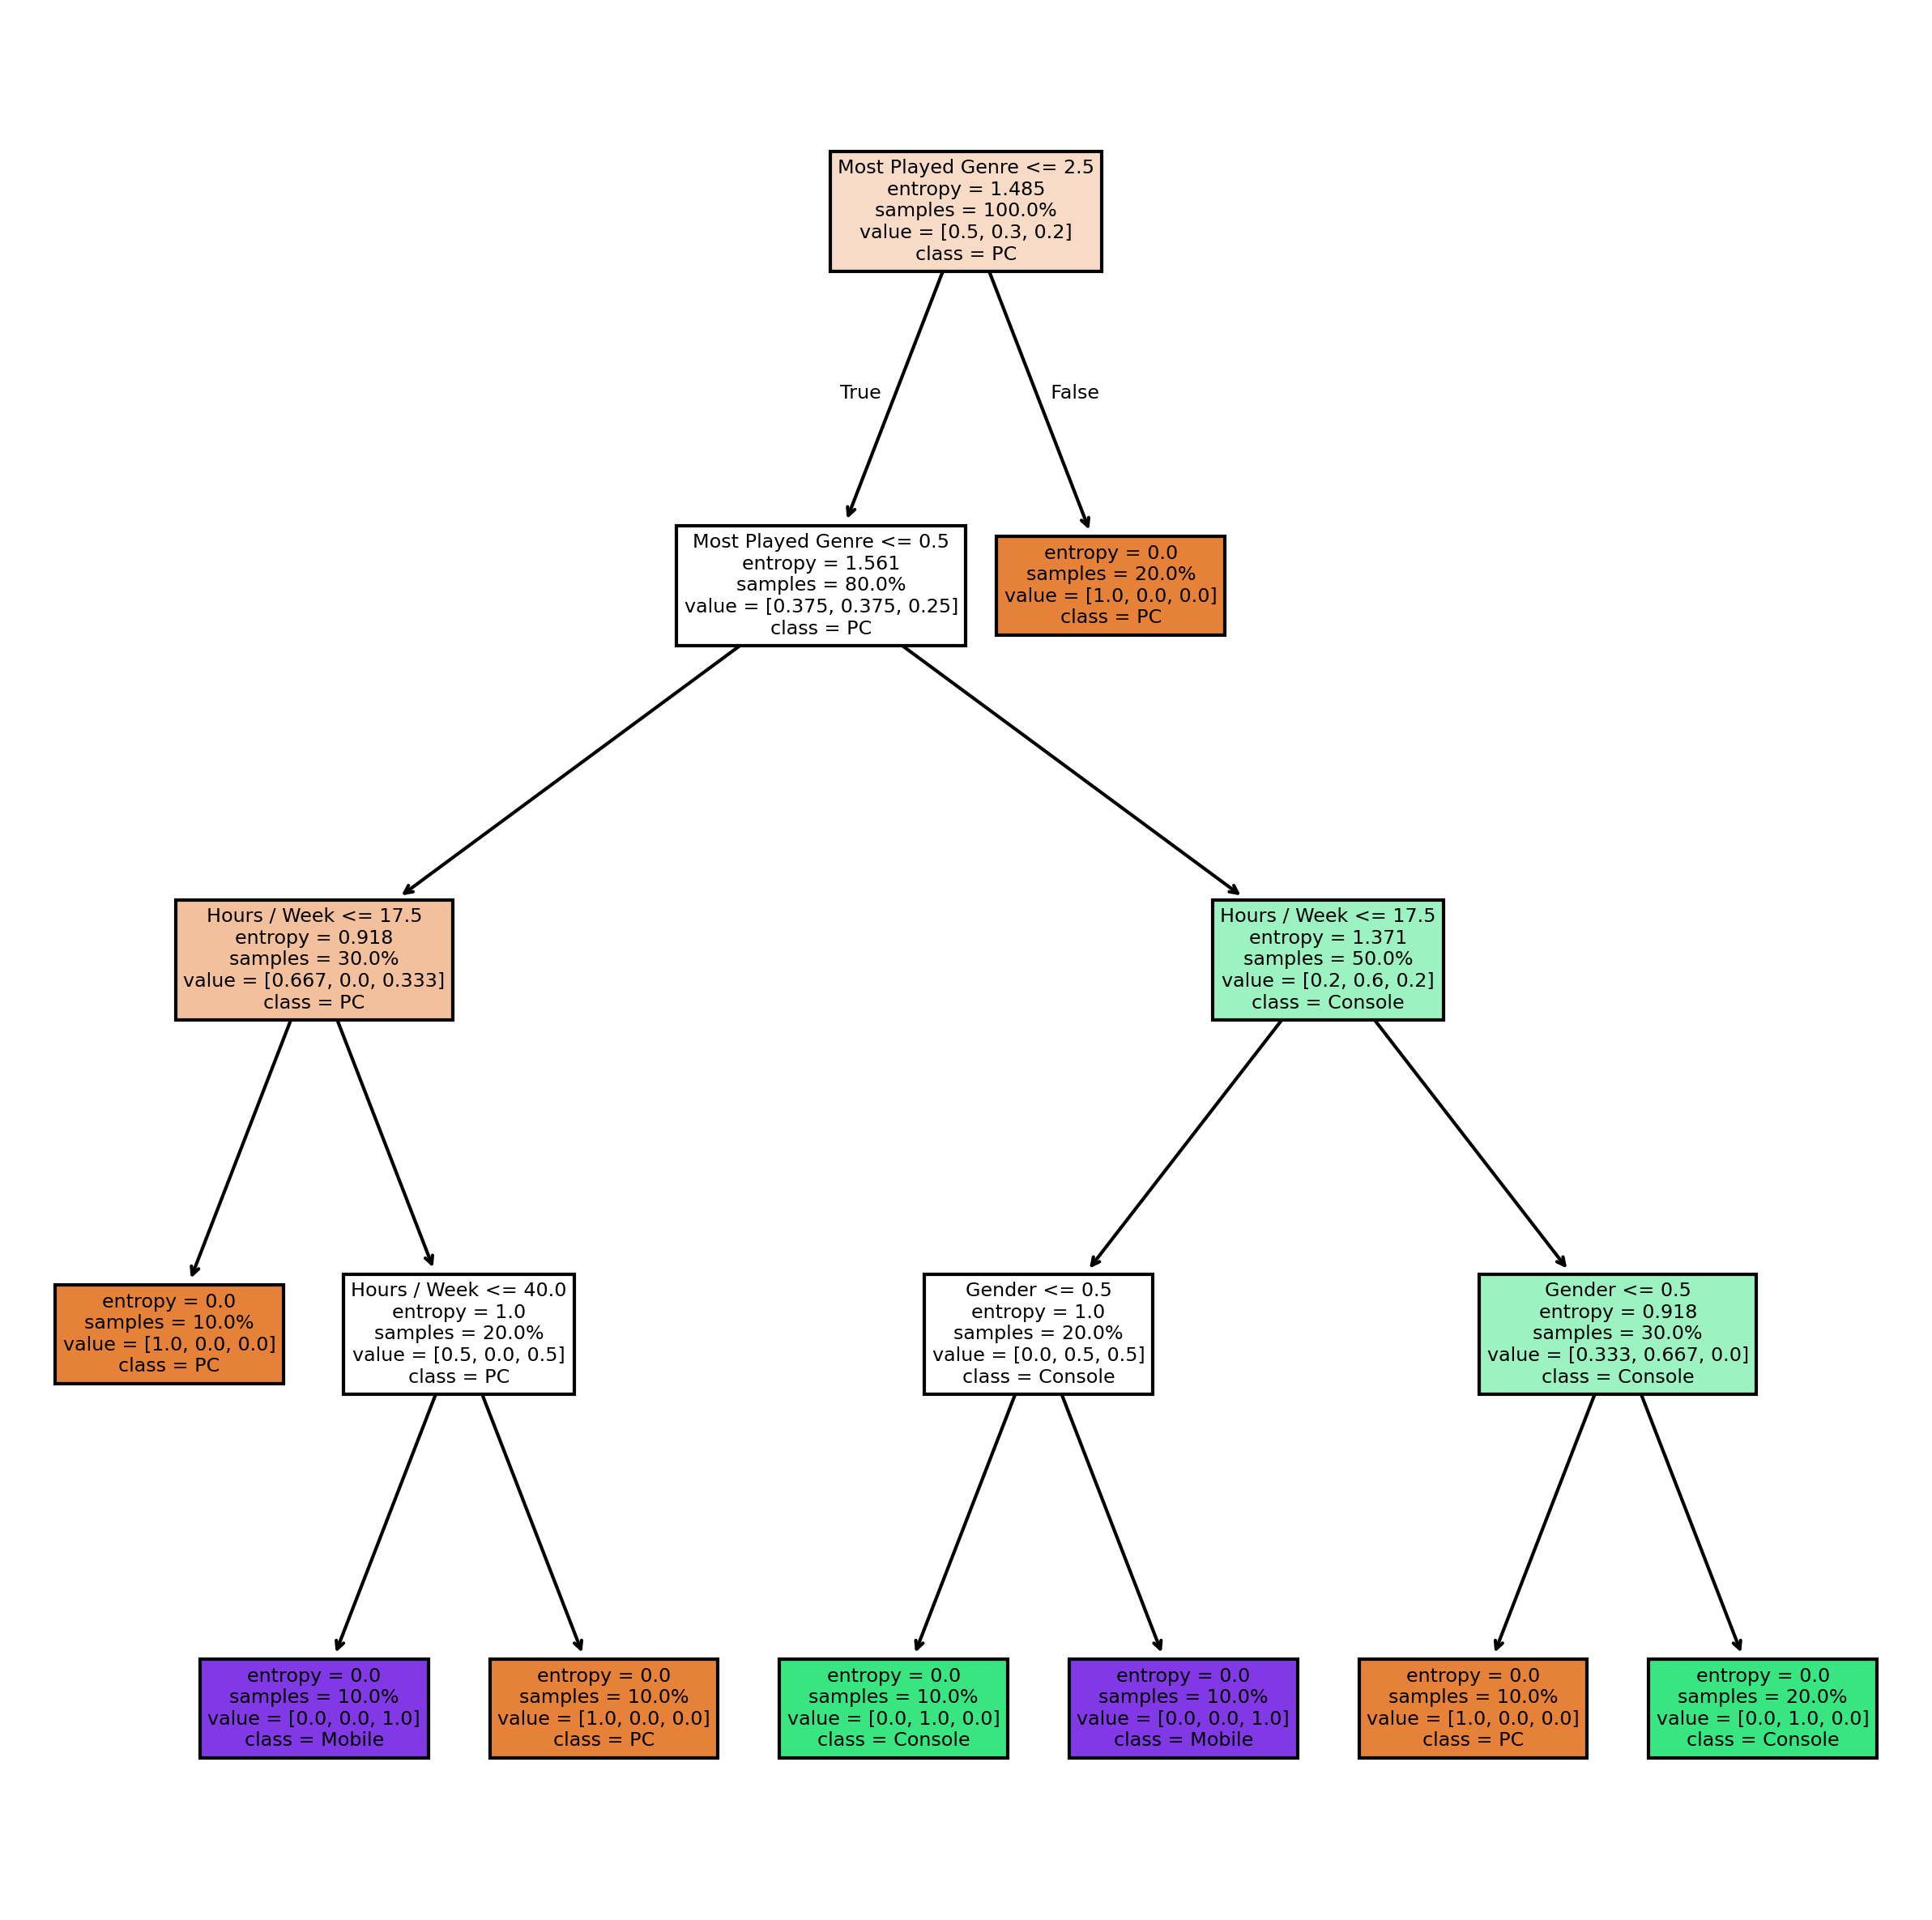

In [6]:
# Week 40 - Assignment 1
"""
Write python code for decision tree building
Use random dataset you create with at least 3 different probability distribution (attributes)
"""

## -------- Libraries --------

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## -------- Dataset --------

gamers = pd.DataFrame({
    "Gender": [
        "Male","Male","Female","Male","Female","Female","Male","Female","Male","Female"
    ],
    "Hours / Week": [
        5,20,35,10,50,15,40,25,30,12
    ],
    "Most Played Genre": [
        "RPG","Shooter","Shooter","Sports","RPG","Sports","Strategy","Shooter","RPG","Strategy"
    ],
    "Platform": [
        "PC","PC","Console","Console","PC","Mobile","PC","Console","Mobile","PC"
    ]
})
print(gamers)

# -------- Categorize features --------

## Map data columns (attributes) to integer category label with pandas "factorize" function
gamers["Gender_cat"], gender_classes = pd.factorize(gamers["Gender"])
gamers["Genre_cat"], genre_classes = pd.factorize(gamers["Most Played Genre"])
gamers["Hours_cat"], hours_classes = pd.factorize(gamers["Hours / Week"])
gamers["Platform_cat"], platform_classes = pd.factorize(gamers["Platform"])

## Extract readable class labels for leaf nodes
platform_labels = list(platform_classes)

## Features (x) and Target (y)
x = gamers[["Gender_cat", "Hours / Week", "Genre_cat"]]
y = gamers["Platform_cat"]

# -------- Decision Tree --------

clf = DecisionTreeClassifier(max_leaf_nodes=10, criterion="entropy")
clf.fit(x, y)

# -------- Plotting --------

plt.figure(figsize=(10, 10), dpi=300)
plot_tree(
    clf, 
    feature_names=["Gender", "Hours / Week", "Most Played Genre"],
    class_names=platform_labels,
    proportion=True, 
    filled=True
)
plt.show()
